In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, ensemble, linear_model, neural_network, metrics, inspection
from soyviz import plot_los_tres, plot_estres
import matplotlib.pyplot as plt

from pickle import load, dump

In [2]:
venancio = pd.read_parquet('../expresion/venancio_bias_corrected.parquet')
venancio

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMD00025071               16                4               11   
SAMD00025072                9                2                3   
SAMD00025073               16                4               10   
SAMD00133785                0                0                1   
SAMD00133786                0                0                0   
...                       ...              ...              ...   
SAMN14277281               47                4                6   
SAMN14277282               68                6               10   
SAMN14277283              270               33               49   
SAMN14277284              176               37               31   
SAMN14277285               91               22               15   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMD00025071                2                5               12   
SAMD00025072                0                0                2   
SAMD00025073                0               13               11   
SAMD00133785                6                0                0   
SAMD00133786                0                0                2   
...                       ...              ...              ...   
SAMN14277281                8                4                6   
SAMN14277282               16                3                7   
SAMN14277283               60               34               25   
SAMN14277284               66               30               24   
SAMN14277285               33               27               21   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMD00025071               11                8               70   
SAMD00025072                6                1               17   
SAMD00025073                9                7               76   
SAMD00133785               69                0              209   
SAMD00133786               44                0              143   
...                       ...              ...              ...   
SAMN14277281               15               20              752   
SAMN14277282               25               16              898   
SAMN14277283               70               68              826   
SAMN14277284               83               29             1182   
SAMN14277285               42               34              868   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMD00025071              102  ...              0              0   
SAMD00025072               31  ...              0              0   
SAMD00025073              102  ...              0              0   
SAMD00133785              101  ...              0              0   
SAMD00133786              190  ...              0              0   
...                       ...  ...            ...            ...   
SAMN14277281              517  ...              0              0   
SAMN14277282              503  ...              0              4   
SAMN14277283              622  ...              0              0   
SAMN14277284              764  ...              0              0   
SAMN14277285              537  ...              0              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMD00025071              0              0              0              1   
SAMD00025072              0              0              0              1   
SAMD00025073              0              0              0              4   
SAMD00133785              0              0              0              0   
SAMD00133786              0              0              0              3   
...                     ...            ...            ...            ...   
SAMN14277281              0              0              0              1   
SAMN14277282              0              0              3             10   
SAMN14277283              0              0              0             15   
SAMN1427

In [3]:
annot = pd.read_csv('../anotacion/gemini_annot.csv', index_col=0)
annot = annot[annot['tejido'].notna() & annot['estres'].notna()]
annot = annot.loc[(annot['tejido'] == 'leaf') | (annot['tejido'] == 'root') | (annot['tejido'] == 'seed') | (annot['tejido'] == 'stem')]
annot

bioproject tejido   estres tratamiento
biosample                                            
SAMD00276044   PRJDB11138   leaf  control     control
SAMD00276046   PRJDB11138   leaf  control     control
SAMD00276048   PRJDB11138   leaf  control     control
SAMD00276050   PRJDB11138   leaf  control     control
SAMD00276052   PRJDB11138   leaf  control     control
...                   ...    ...      ...         ...
SAMN36760719  PRJNA999924   seed     cold   treatment
SAMN36760720  PRJNA999924   seed     cold   treatment
SAMN36760721  PRJNA999924   seed     cold   treatment
SAMN36760722  PRJNA999924   seed     cold   treatment
SAMN36760723  PRJNA999924   seed     cold   treatment

[7733 rows x 4 columns]

## Preprocesado

In [4]:
annot['bioproject'].value_counts()

bioproject
PRJNA648781     572
PRJNA910939     474
PRJNA706999     216
PRJNA478334     190
PRJNA1078438    162
               ... 
PRJNA308216       1
PRJNA324522       1
PRJNA149623       1
PRJNA356948       1
PRJNA999740       1
Name: count, Length: 613, dtype: int64

In [5]:
y = annot[annot['bioproject'] == 'PRJNA706999']
X, y = venancio.align(y, join='inner', axis=0)

X

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMN21359773               68                4               13   
SAMN21359774               63                0               16   
SAMN21359775               84                0               15   
SAMN21359776              152               15               36   
SAMN21359777              150               17               34   
...                       ...              ...              ...   
SAMN21359768              116                4               31   
SAMN21359769              192               14               33   
SAMN21359770               66                0               12   
SAMN21359771               32                0                1   
SAMN21359772               95                4               31   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMN21359773                5               16                9   
SAMN21359774               15               16                0   
SAMN21359775                8               21                5   
SAMN21359776               35               29                3   
SAMN21359777               31               69               16   
...                       ...              ...              ...   
SAMN21359768               28               18               12   
SAMN21359769               49               20               12   
SAMN21359770                5               11                0   
SAMN21359771                0                1                0   
SAMN21359772               16               18                0   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMN21359773               37               41              302   
SAMN21359774               12               11              273   
SAMN21359775               44               43              355   
SAMN21359776               76               25              577   
SAMN21359777              103               25              517   
...                       ...              ...              ...   
SAMN21359768               42               37              350   
SAMN21359769               63              101              643   
SAMN21359770                9               48              234   
SAMN21359771                4               21              250   
SAMN21359772               11              106              455   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMN21359773              330  ...              3              0   
SAMN21359774              391  ...              0              0   
SAMN21359775              397  ...              3              0   
SAMN21359776              760  ...              0              0   
SAMN21359777              568  ...              0              0   
...                       ...  ...            ...            ...   
SAMN21359768              267  ...             11              5   
SAMN21359769              591  ...              4              0   
SAMN21359770              239  ...              2              9   
SAMN21359771              232  ...             10              0   
SAMN21359772              395  ...             14              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMN21359773              0              0              0              4   
SAMN21359774              0              0              0              2   
SAMN21359775              0              0              0              6   
SAMN21359776              0              0              0              7   
SAMN21359777              0              0              0              4   
...                     ...            ...            ...            ...   
SAMN21359768              0              0              0              8   
SAMN21359769              0              0              0             14   
SAMN21359770              0              0              0              0   
SAMN2135

In [ ]:
plot_los_tres(X, y.rename(columns={'estres': 'es', 'tratamiento': 'estres'}))
plt.suptitle('Muestras de PRJNA706999')

In [7]:
y = y['estres']
y.value_counts()

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
X_train

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMN21359807               68                4                4   
SAMN21359757              151               20               21   
SAMN21359827              119                2               23   
SAMN21359741               61                2               17   
SAMN21359685              192                8               40   
...                       ...              ...              ...   
SAMN21359731               21                2                3   
SAMN21359876               69                0                0   
SAMN21359750                0                0                0   
SAMN21359702               47                2               13   
SAMN21359843               83                2               21   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMN21359807               10               15                0   
SAMN21359757               23               36                0   
SAMN21359827               25               30                6   
SAMN21359741               11               16                1   
SAMN21359685               11               28               10   
...                       ...              ...              ...   
SAMN21359731                0                0                0   
SAMN21359876               10                0                0   
SAMN21359750                0                0                0   
SAMN21359702                0               15                4   
SAMN21359843               28                6                0   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMN21359807               24               10              239   
SAMN21359757               24               26              172   
SAMN21359827               16               18              342   
SAMN21359741               18               31              289   
SAMN21359685               45               31              769   
...                       ...              ...              ...   
SAMN21359731               13               17              104   
SAMN21359876                0              212              111   
SAMN21359750                0                0                0   
SAMN21359702               23               37              186   
SAMN21359843               24               11              159   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMN21359807              297  ...              0              0   
SAMN21359757              236  ...              0              0   
SAMN21359827              341  ...              0              0   
SAMN21359741              213  ...              0              4   
SAMN21359685              474  ...              5              0   
...                       ...  ...            ...            ...   
SAMN21359731               67  ...             13              0   
SAMN21359876              283  ...              0              0   
SAMN21359750                0  ...              0              0   
SAMN21359702              157  ...              0              0   
SAMN21359843              226  ...              0              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMN21359807              0              0              0              0   
SAMN21359757              0              0              0              0   
SAMN21359827              0              0              0              2   
SAMN21359741              0              0              0              0   
SAMN21359685              0              0              0              1   
...                     ...            ...            ...            ...   
SAMN21359731              0              0              0              0   
SAMN21359876              0              0              0              0   
SAMN21359750              0              0              0              0   
SAMN2135

## Alternativos
### Random forest

In [9]:
random_forest = ensemble.RandomForestClassifier()
params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(20, 50, 10),
    'min_samples_split': np.arange(2, 15, 4),
    'min_samples_leaf': np.arange(2, 15, 4),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

In [10]:
search = model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions=params, n_jobs=-1, scoring='roc_auc_ovr', verbose=2)

search.fit(X_train, y_train)
search.cv_results_['mean_test_score'].mean()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimato

0.7649911151960785

In [11]:
forest = search.best_estimator_
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
forest.score(X_test, y_test)

0.7962962962962963

In [13]:
metrics.f1_score(y_test, forest.predict(X_test), pos_label='nutrient')

0.8135593220338984

Text(0.5, 1.0, 'Importancias de features ordenadas (Random Forest)')

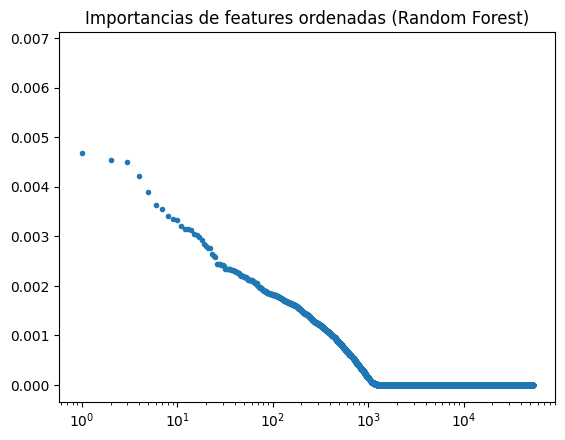

In [14]:
importances = pd.DataFrame({'importance': np.flip(np.sort(forest.feature_importances_))}, index=X_train.columns[np.flip(forest.feature_importances_.argsort())])
plt.semilogx(importances['importance'].to_list(), '.')
plt.title('Importancias de features ordenadas (Random Forest)')

In [15]:
importances.to_csv('importancias_1_rf.csv')

### Gradient boosting

In [16]:
gbr = ensemble.GradientBoostingClassifier()
params = {
    "loss": ['log_loss'],
    "learning_rate": np.arange(0, 10, 1),
    "n_estimators": np.arange(1, 200, 1),
    "max_depth": np.arange(1, 50, 1),
    "max_features": ['sqrt', 'log2']
}

In [17]:
try:
    with open('gradient_1.pkl', 'rb') as f:
        gradient = load(f)
except:
    search = model_selection.RandomizedSearchCV(gbr, param_distributions=params, n_jobs=-1, scoring='roc_auc_ovr', verbose=3)
    search.fit(X_train, y_train)

    gradient = search.best_estimator_
    with open('gradient_1.pkl', 'wb') as f:
        dump(gradient, f, protocol=5)

In [18]:
gradient.score(X_test, y_test)

0.9259259259259259

In [19]:
metrics.f1_score(y_test, gradient.predict(X_test), pos_label='nutrient')

0.9285714285714286

Text(0.5, 1.0, 'Importancias de features ordenadas (Gradient boosted trees)')

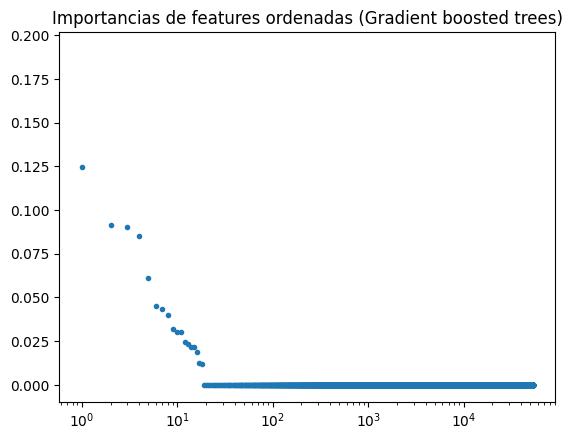

In [20]:
importances = pd.DataFrame({'importance': np.flip(np.sort(gradient.feature_importances_))}, index=X_train.columns[np.flip(gradient.feature_importances_.argsort())])
plt.semilogx(importances['importance'].to_list(), '.')
plt.title('Importancias de features ordenadas (Gradient boosted trees)')

In [21]:
importances.to_csv('importancias_1_gbr.csv')

## Tradicionales
### DESeq2

In [22]:
from pydeseq2.ds import DeseqStats, DefaultInference, DeseqDataSet
import dash_bio

In [23]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=X,
    metadata=pd.DataFrame({'tratamiento': y}),
    design_factors="tratamiento",  # compare samples based on the "condition"
    refit_cooks=True,
    inference=inference,
)

In [24]:
dds.deseq2()

Fitting size factors...
... done in 0.20 seconds.

Fitting dispersions...
... done in 13.57 seconds.

Fitting dispersion trend curve...
/home/godo/.local/lib/python3.10/site-packages/pydeseq2/dds.py:715: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 14.79 seconds.

Fitting LFCs...
... done in 9.43 seconds.

Calculating cook's distance...
... done in 0.90 seconds.

Replacing 1244 outlier genes.

Fitting dispersions...
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 0.37 seconds.



In [25]:
soy_stat = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)
soy_stat.summary()

Running Wald tests...
... done in 3.39 seconds.



Log2 fold change & Wald test p-value: tratamiento nutrient vs control
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
Glyma.01G000100  84.818534        0.098961  0.080436  1.230301  0.218584   
Glyma.01G000137   5.032034        0.269871  0.189535  1.423858  0.154488   
Glyma.01G000174  16.333904        0.128561  0.139646  0.920622  0.357248   
Glyma.01G000211  10.580445        0.314509  0.167134  1.881776  0.059866   
Glyma.01G000248  17.317431        0.323215  0.169118  1.911180  0.055981   
...                    ...             ...       ...       ...       ...   
Glyma.U045402     2.969155       -0.131522  0.302651 -0.434568  0.663876   
Glyma.U045502     0.294457       -0.385120  0.706221 -0.545326  0.585529   
Glyma.U045602     1.207078        0.764461  0.511951  1.493231  0.135377   
Glyma.U045702     1.379302        0.116623  0.384121  0.303609  0.761426   
Glyma.U045802     

In [26]:
np.log(soy_stat.p_values)

Gene
Glyma.01G000100   -1.520584
Glyma.01G000137   -1.867641
Glyma.01G000174   -1.029326
Glyma.01G000211   -2.815639
Glyma.01G000248   -2.882735
                     ...   
Glyma.U045402     -0.409659
Glyma.U045502     -0.535239
Glyma.U045602     -1.999693
Glyma.U045702     -0.272562
Glyma.U045802     -0.016943
Length: 52837, dtype: float64

Text(0.5, 1.0, 'Volcano plot PRJNA706999')

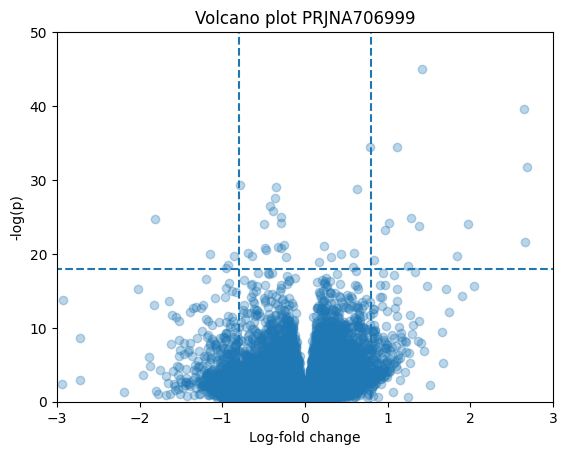

In [27]:
plt.scatter(soy_stat.LFC['tratamiento_nutrient_vs_control'], -np.log(soy_stat.p_values), alpha=0.3)
plt.ylabel('-log(p)')
plt.xlabel('Log-fold change')
plt.hlines(18, xmin=-5, xmax=5, linestyles='dashed')
plt.vlines([-0.8, 0.8], ymin=-1, ymax=100, linestyles='dashed')
plt.xlim(-3, 3)
plt.ylim(0, 50)
plt.title('Volcano plot PRJNA706999')

In [28]:
res = soy_stat.results_df[soy_stat.results_df['pvalue'].notna()].reset_index()
res['SNP'] = '1'
dash_bio.VolcanoPlot(dataframe=res.rename({
    'pvalue': 'P',
    'Gene': 'GENE',
    'log2FoldChange': 'EFFECTSIZE'
    # GENE
}, axis=1))